In [3]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv(r'D:\Balance.csv', sep = ';')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class      625 non-null object
Left_W     625 non-null int64
Left_D     625 non-null int64
Right_W    625 non-null int64
Right_D    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


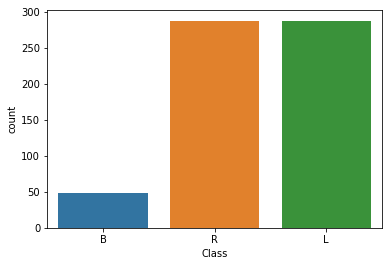

In [6]:
sns.countplot(x=data['Class'])
plt.show()

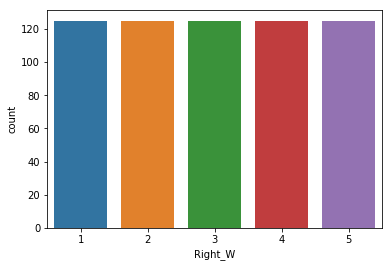

In [7]:
sns.countplot(x=data['Right_W'])
plt.show()

In [8]:
le = LabelEncoder()

In [9]:
data['Class']=le.fit_transform(data['Class'].astype(str))
data['Class']=le.fit_transform(data['Class'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class      625 non-null int64
Left_W     625 non-null int64
Left_D     625 non-null int64
Right_W    625 non-null int64
Right_D    625 non-null int64
dtypes: int64(5)
memory usage: 24.5 KB


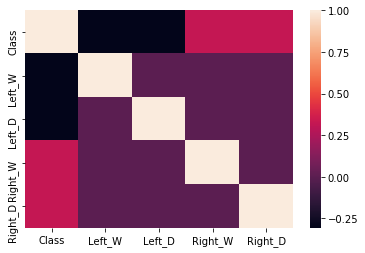

In [11]:
sns.heatmap(data.corr(method='pearson'))
plt.show()

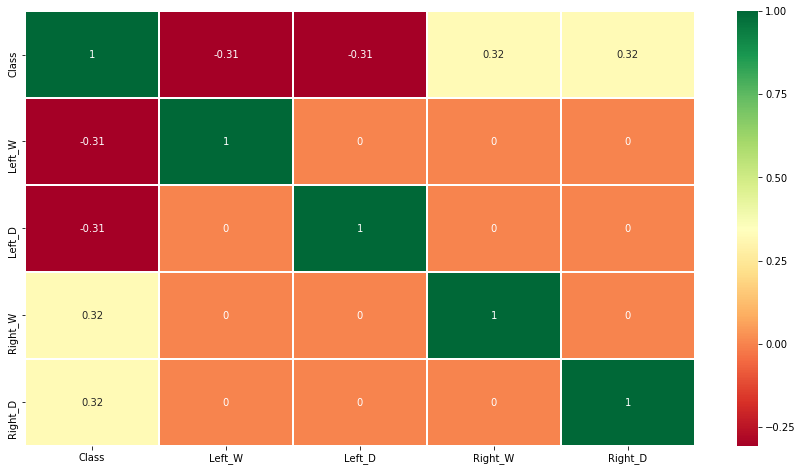

In [12]:
sns.heatmap(data.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [14]:
trainX_=data.drop("Class", axis=1)
trainY_ = data['Class']
X_train, X_test, y_train, y_test = train_test_split(trainX_, trainY_, test_size = 0.20, random_state = 123)

In [15]:
#Random Vorest
RF = RandomForestClassifier(max_depth=None, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
RF.score(X_train, y_train)

0.99

In [17]:
RF.score(trainX_, trainY_)

0.9536

In [18]:
y_predict=RF.predict(X_test)

In [19]:
y_predict=RF.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[ 0  4  5]
 [ 5 48  1]
 [ 8  1 53]]


In [20]:
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
conf_matrix_df

,0,2,1
0,0,4,5
2,5,48,1
1,8,1,53


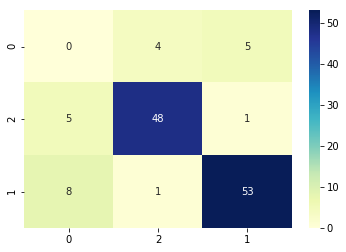

In [21]:
conf_matrix= confusion_matrix(y_test, y_predict)
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [22]:
akurasiRF=accuracy_score(y_test, y_predict)
presisiRF=precision_score(y_test, y_predict, average='weighted')
recallsRF=recall_score(y_test,y_predict, average='weighted')

In [23]:
print(akurasiRF)
print(presisiRF)
print(recallsRF)

0.808
0.8368046050527663
0.808


In [24]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label=2)
auc = auc(fpr, tpr)
print('aucRF =', auc)

aucRF = 0.827188940092166


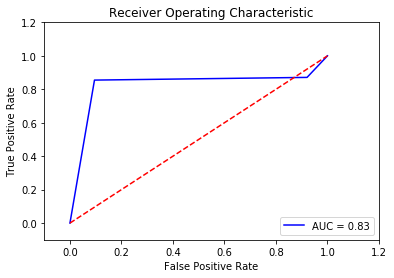

In [25]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn.score(X_train, y_train)

0.868

In [30]:
yknn_predict=knn.predict(X_test)

In [31]:
conf_matrix = confusion_matrix(y_test, yknn_predict)
print(conf_matrix)

[[ 0  6  3]
 [ 2 51  1]
 [ 5  4 53]]


In [32]:
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)
conf_matrix_df

,0,2,1
0,0,6,3
2,2,51,1
1,5,4,53


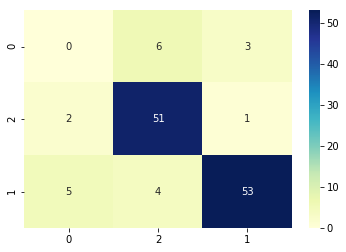

In [33]:
conf_matrixknn= confusion_matrix(y_test, yknn_predict)
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixknn, columns=Class, index=Class)
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [34]:
akurasiKnn=accuracy_score(y_test, yknn_predict)
presisiKnn=precision_score(y_test, yknn_predict, average='weighted')
recallsKnn=recall_score(y_test,yknn_predict, average='weighted')

In [35]:
print(akurasiKnn)
print(presisiKnn)
print(recallsKnn)

0.832
0.8223733103249928
0.832


In [36]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, yknn_predict, pos_label =2 )
auc = auc(fpr, tpr)
print('aucKnn =', auc)

aucKnn = 0.8602150537634409


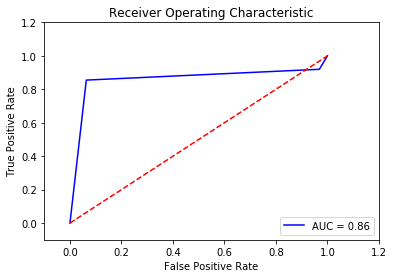

In [37]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
# SVM
svclin = svm.SVC(kernel='linear')

In [39]:
svclin.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svclin.score(X_train, y_train)

0.916

In [41]:
svclin_predict=svclin.predict(X_test)

In [42]:
conf_matrixsvclin = confusion_matrix(y_test, svclin_predict)
print(conf_matrixsvclin)

[[ 9  0  0]
 [ 2 52  0]
 [ 7  1 54]]


In [43]:
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixsvclin, columns=Class, index=Class)
conf_matrix_df

,0,2,1
0,9,0,0
2,2,52,0
1,7,1,54


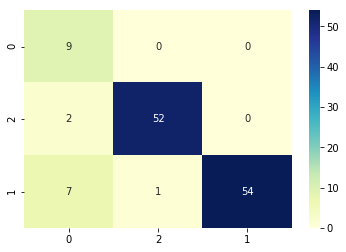

In [44]:
conf_matrixsvclin= confusion_matrix(y_test, svclin_predict)
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixsvclin, columns=Class, index=Class)
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [45]:
akurasiSVM=accuracy_score(y_test, svclin_predict)
presisiSVM=precision_score(y_test, svclin_predict, average= 'weighted' )
recallsSVM=recall_score(y_test,svclin_predict, average= 'weighted' )

In [46]:
print(akurasiSVM)
print(presisiSVM)
print(recallsSVM)

0.92
0.9558490566037735
0.92


In [47]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label=2)
auc = auc(fpr, tpr)
print('aucSVM =', auc)

aucSVM = 0.827188940092166


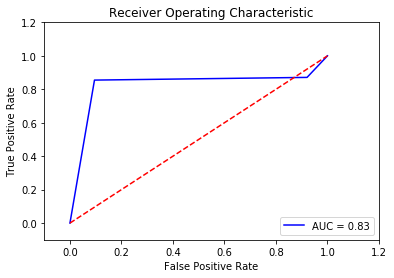

In [48]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
#naive bayes
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [50]:
nb.score(X_train, y_train)

0.896

In [51]:
ynb_predict=nb.predict(X_test)

In [52]:
conf_matrixnb = confusion_matrix(y_test, ynb_predict)
print(conf_matrixnb)

[[ 0  6  3]
 [ 0 54  0]
 [ 0  5 57]]


In [53]:
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixnb, columns=Class, index=Class)
conf_matrix_df

,0,2,1
0,0,6,3
2,0,54,0
1,0,5,57


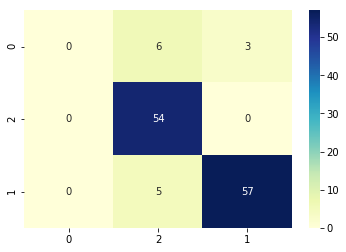

In [54]:
conf_matrixnb= confusion_matrix(y_test, ynb_predict)
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixnb, columns=Class, index=Class)
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [55]:
akurasiNB=accuracy_score(y_test, ynb_predict)
presisiNB=precision_score(y_test, ynb_predict, average = 'weighted')
recallsNB=recall_score(y_test,ynb_predict, average = 'weighted')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
print(akurasiNB)
print(presisiNB)
print(recallsNB)

0.888
0.8300923076923077
0.888


In [57]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, ynb_predict, pos_label = 2)
auc = auc(fpr, tpr)
print('aucNB =', auc)

aucNB = 0.9358678955453149


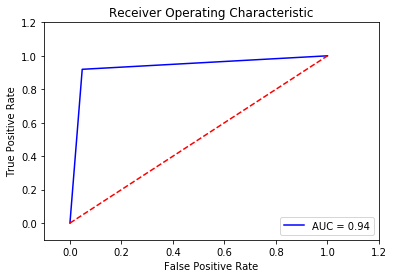

In [58]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, auc, roc_curve
clf=DecisionTreeClassifier(random_state=99, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [61]:
clf.score(X_train, y_train)

0.856

In [62]:
ytree_predict=clf.predict(X_test)

In [63]:
ytree_proba=clf.predict_proba(X_test)

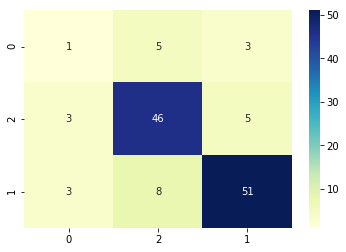

In [64]:
conf_matrixtree = confusion_matrix(y_test, ytree_predict)
Class= data['Class'].unique()
conf_matrix_tree = pd.DataFrame(data=conf_matrixtree, columns=Class, index=Class)
sns.heatmap(conf_matrix_tree, annot=True, cmap="YlGnBu")
plt.show()

In [65]:
akurasitree=accuracy_score(y_test, ytree_predict)
presisitree=precision_score(y_test, ytree_predict, average = 'weighted')
recallstree=recall_score(y_test,ytree_predict,  average = 'weighted')
print(akurasitree)
print(presisitree)
print(recallstree)

0.784
0.7758450363196127
0.784


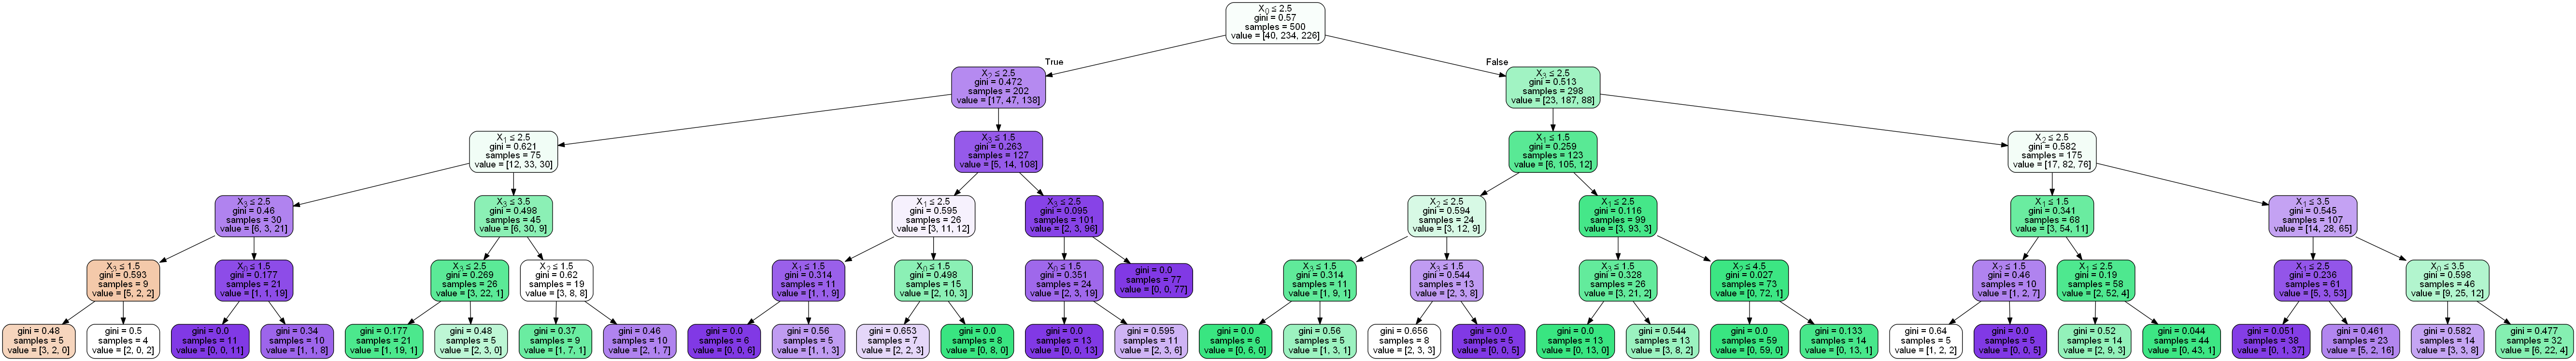

In [66]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [67]:
### feature enginering

In [68]:
data.head()

,Class,Left_W,Left_D,Right_W,Right_D
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [69]:
data['Leftscale']=data['Left_W']*data['Left_W']
data['Rightscale']=data['Right_D']*data['Right_W']

In [70]:
data.head()

,Class,Left_W,Left_D,Right_W,Right_D,Leftscale,Rightscale
0,0,1,1,1,1,1,1
1,2,1,1,1,2,1,2
2,2,1,1,1,3,1,3
3,2,1,1,1,4,1,4
4,2,1,1,1,5,1,5


In [71]:
a=data.drop("Left_W", axis=1)
b=a.drop("Left_D", axis=1)
c=b.drop("Right_W", axis=1)
d=c.drop("Right_D", axis=1)
trainX_=d.drop("Class", axis=1)
trainY_ = data['Class']
X_train, X_test, y_train, y_test = train_test_split(trainX_, trainY_, test_size = 0.20, random_state = 123)

In [72]:
# SVM Eninerring
svclin = svm.SVC(kernel='linear')
svclin.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
svclin.score(X_train, y_train)

0.778

In [74]:
svclin_predict=svclin.predict(X_test)

In [75]:
conf_matrixsvclin = confusion_matrix(y_test, svclin_predict)
print(conf_matrixsvclin)

[[ 0  6  3]
 [ 0 52  2]
 [ 0 18 44]]


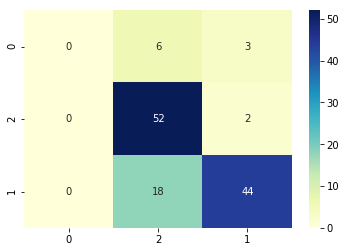

In [76]:
conf_matrixsvclin= confusion_matrix(y_test, svclin_predict)
Class= data['Class'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixsvclin, columns=Class, index=Class)
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [77]:
akurasiSVM=accuracy_score(y_test, svclin_predict)
presisiSVM=precision_score(y_test, svclin_predict, average= 'weighted' )
recallsSVM=recall_score(y_test,svclin_predict, average= 'weighted' )

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [78]:
print(akurasiSVM)
print(presisiSVM)
print(recallsSVM)

0.768
0.7409667024704619
0.768
